## Appendix 1 - Python Code and Outputs

### Data Preparation

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Import Data

In [2]:
import pandas as pd
titanic_training_data = pd.read_csv('train.csv')

# show first five rows of the data
titanic_training_data.head(100)
# show number of columns and rows
titanic_training_data.shape

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


(891, 12)

### Exploratory Data Analysis

First, we can categorize each variable as either an indicator variable, multi-category categorical variable, or numeric variable.  Then we can proceed in our exploratory data analysis by constructing the appropriate visualization for each type of variable.

,Age,Fare,SibSp,Parch
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.523008,0.381594
std,14.526497,49.693429,1.102743,0.806057
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,38.000000,31.000000,1.000000,0.000000
max,80.000000,512.329200,8.000000,6.000000


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fare'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>]], dtype=object)

<AxesSubplot:title={'center':'Pclass'}>

<AxesSubplot:title={'center':'Embarked'}>

<AxesSubplot:title={'center':'Cabin'}>

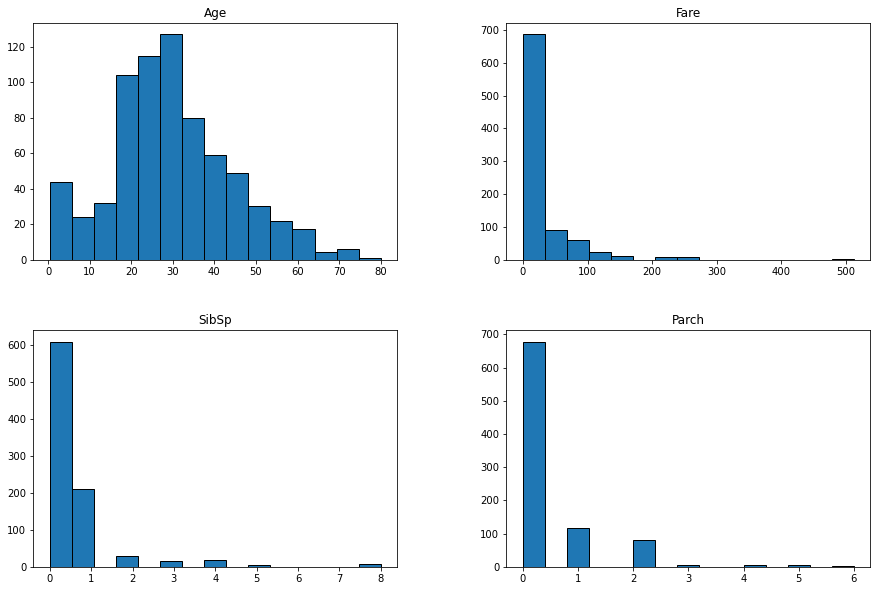

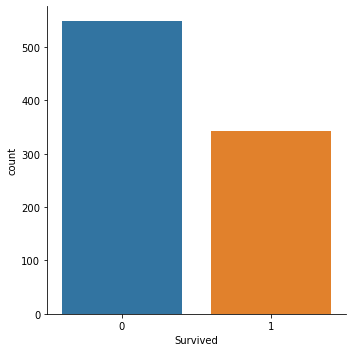

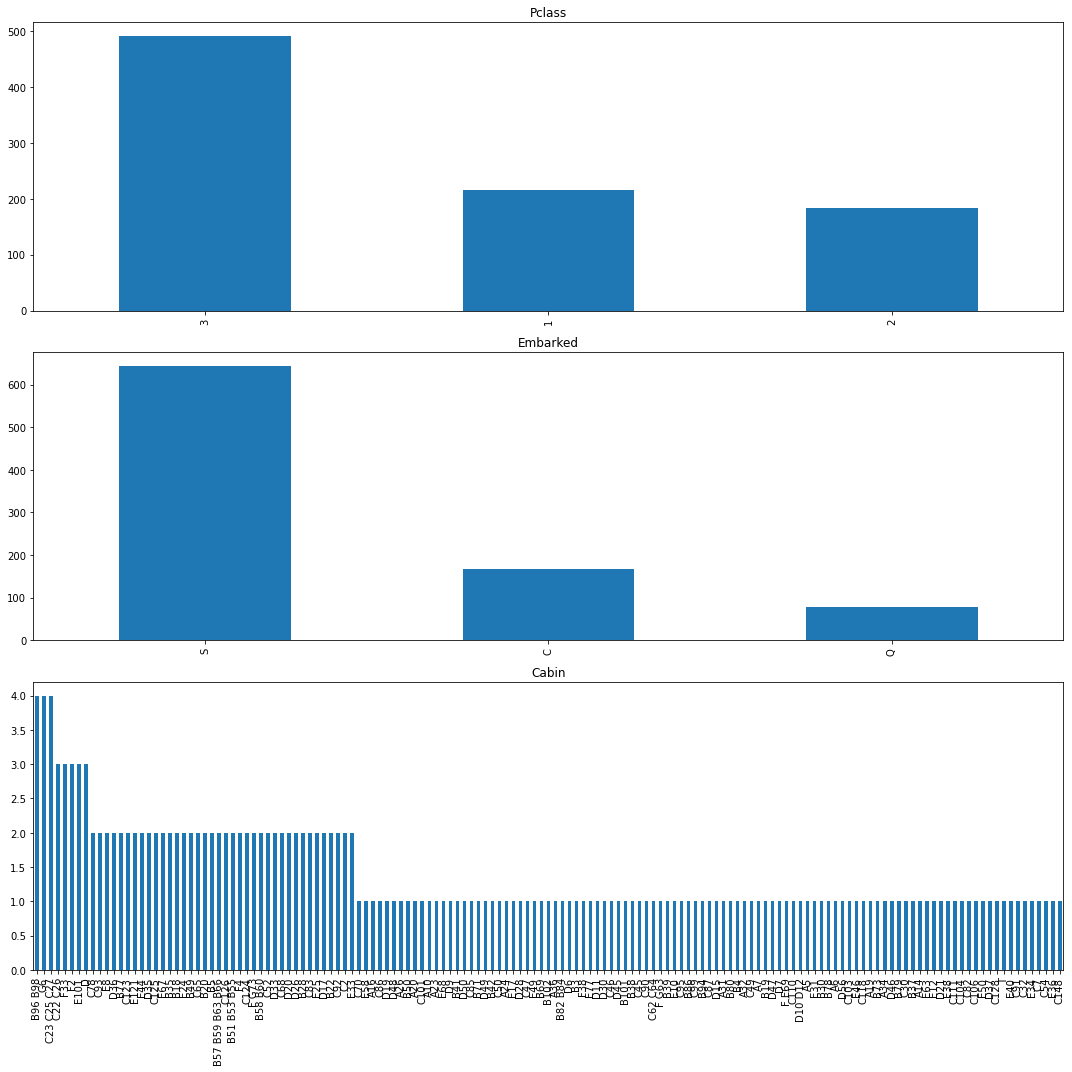

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numeric_variables = ['Age', 'Fare', 'SibSp', 'Parch']

indicator_variables = ['Survived']

categorical_variables = ['Pclass', 'Embarked', 'Cabin']

# Numeric Variable Visualizations
titanic_training_data[numeric_variables].describe()

titanic_training_data[numeric_variables].hist(edgecolor = 'black', 
                                             bins = 15, figsize = (15, 10),
                                             layout = (2, 2), grid = False)


# Indicator Variable Visualizations
sns.catplot(x = 'Survived', kind = 'count', data = titanic_training_data)


# Categorical Variable Visualizations
fig, ax = plt.subplots(3, 1, figsize = (15, 15))
for var, subplot in zip(categorical_variables, ax.flatten()):
    titanic_training_data[var].value_counts().plot(kind = 'bar', ax = subplot, title = var)

fig.tight_layout()





### Investigation of Missing Data and Outliers

In [4]:
# find null counts, percentage of null values, and column type
null_count = titanic_training_data.isnull().sum()
null_percentage = titanic_training_data.isnull().sum() * 100 / len(titanic_training_data)
column_type = titanic_training_data.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

,Missing Count,Percentage Missing,Column Type
Cabin,687,77.104377,object
Age,177,19.865320,float64
Embarked,2,0.224467,object


Let's address the missing data appropriately in a new dataframe that we'll name titanic_training_data_cleaned.

In [5]:
# Create a new dataframe called titanic_training_data_cleaned so we don't modify the originally imported data
titanic_training_data_cleaned = titanic_training_data.copy(deep=True)

# change Null values to the most common value (S) for Embarked 
titanic_training_data_cleaned['Embarked'].fillna('S', inplace=True)

# fill Nulls for Age with median value
titanic_training_data_cleaned['Age'].fillna(titanic_training_data_cleaned['Age'].median(), inplace=True)

# Create new cabin-related variables that will be more useful and cleaner than the original cabin variable
titanic_training_data_cleaned['Cabin_Data_Indicator'] = titanic_training_data_cleaned['Cabin'].notna().astype(int)

titanic_training_data_cleaned['First_Cabin_Deck'] = np.where(titanic_training_data_cleaned['Cabin_Data_Indicator'] == 1,
                                                             titanic_training_data_cleaned['Cabin'].astype(str).str[0],
                                                             'None')

# Theoretically we could create a new variable for cabin number here if we're interested in that
# Time permitting, maybe I will circle back to work on that some more, but for now I'm moving on to focus on more
# important pieces of this assignment - especially since intuitively I don't think cabin number should make a huge
# difference for survival rates

# Drop the original Cabin variable since it has so many null values and since some passengers had more than one cabin
# making the original variable difficult to work with
titanic_training_data_cleaned.drop(['Cabin'],axis=1,inplace=True)



Check the distributions of the variables in the newly cleaned dataframe.  Also, check for missing values in this new dataframe.

In [6]:
# show first five rows of the data
titanic_training_data_cleaned.head(20)
# show number of columns and rows
titanic_training_data_cleaned.shape

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Data_Indicator,First_Cabin_Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,None
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,None
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,None
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,0,None
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1,E
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,0,None
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0,None
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0,None


(891, 13)

In [7]:
# find null counts, percentage of null values, and column type
null_count = titanic_training_data_cleaned.isnull().sum()
null_percentage = titanic_training_data_cleaned.isnull().sum() * 100 / len(titanic_training_data)
column_type = titanic_training_data_cleaned.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

,Missing Count,Percentage Missing,Column Type


,Age,Fare,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000
mean,29.361582,32.204208,0.523008,0.381594
std,13.019697,49.693429,1.102743,0.806057
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,7.910400,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,35.000000,31.000000,1.000000,0.000000
max,80.000000,512.329200,8.000000,6.000000


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fare'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>]], dtype=object)

<AxesSubplot:title={'center':'Pclass'}>

<AxesSubplot:title={'center':'Embarked'}>

<AxesSubplot:title={'center':'First_Cabin_Deck'}>

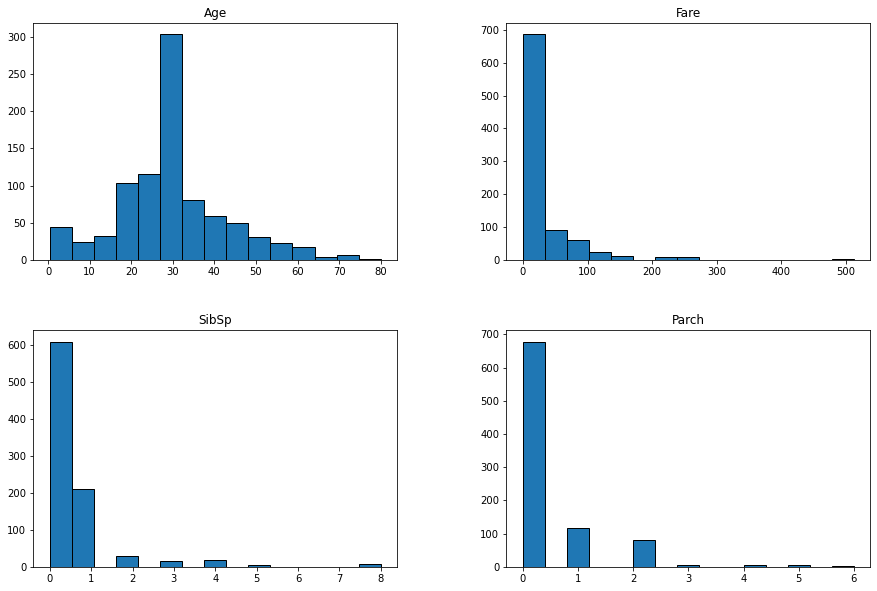

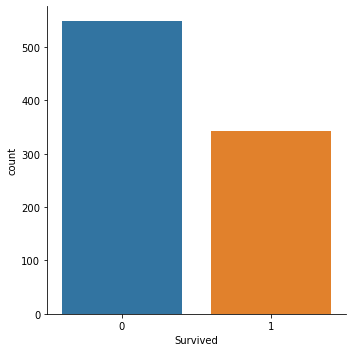

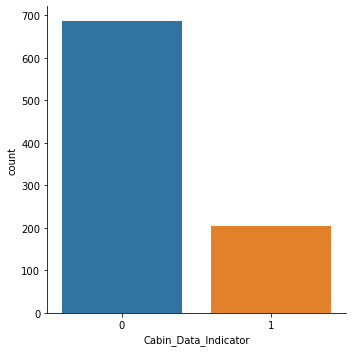

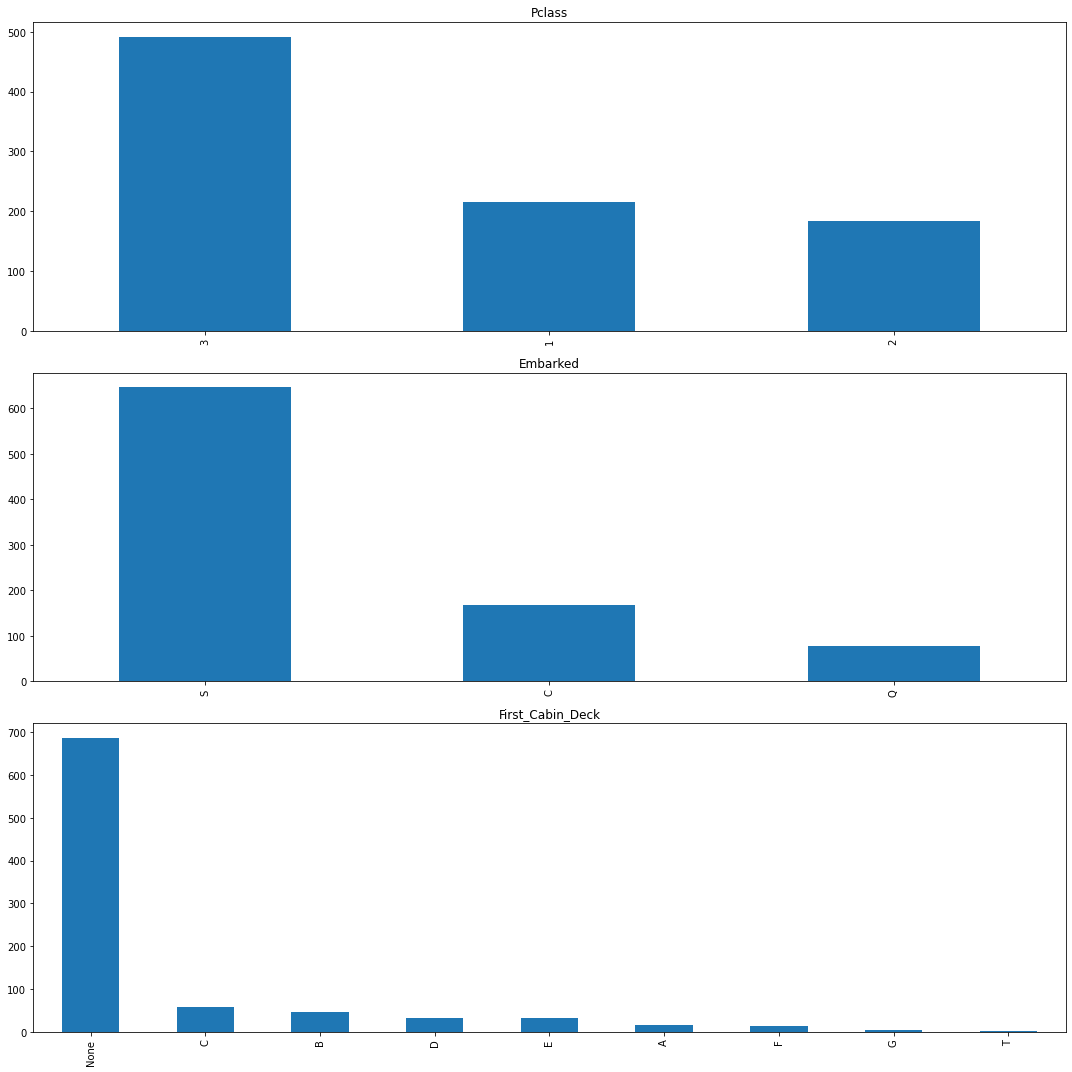

In [9]:
# Update our definitions of the indicator, numeric, and categorical variables to reflect our newly created variables
numeric_variables = ['Age', 'Fare', 'SibSp', 'Parch']

indicator_variables = ['Survived', 'Cabin_Data_Indicator']

categorical_variables = ['Pclass', 'Embarked', 'First_Cabin_Deck']

# Numeric Variable Visualizations
titanic_training_data_cleaned[numeric_variables].describe()

titanic_training_data_cleaned[numeric_variables].hist(edgecolor = 'black', 
                                             bins = 15, figsize = (15, 10),
                                             layout = (2, 2), grid = False)

# Indicator Variable Visualizations

for var, subplot in zip(indicator_variables, ax.flatten()):
    sns.catplot(x = var, kind = 'count', data = titanic_training_data_cleaned)

fig.tight_layout()

    
# Categorical Variable Visualizations
fig, ax = plt.subplots(3, 1, figsize = (15, 15))
for var, subplot in zip(categorical_variables, ax.flatten()):
    titanic_training_data_cleaned[var].value_counts().plot(kind = 'bar', ax = subplot, title = var)

fig.tight_layout()


### Examination of the Relationship between the Dependent Variable and Potential Predictors